In [139]:
import numpy
import scipy
import matplotlib
#importing packages

In [140]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
#importing packages

digits = datasets.load_digits()
#loading digits in size 8x8
type(digits.data[1]) #checking type of data

numpy.ndarray

In [141]:
print(digits.data)
print(digits.target)
#viewing data

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [142]:
clf = svm.SVC(gamma=0.0001, C=100)

In [143]:
X,y = digits.data[:-10], digits.target[:-10]

In [144]:
X=X.reshape(-1,64)
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
print(X.reshape(-1,64)[1:4])
print(clf.predict(digits.data[-5].reshape(-1,64)))
#testing model with learning set 1868 obs and testing set 10 obs.


[[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
   9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]]
[9]


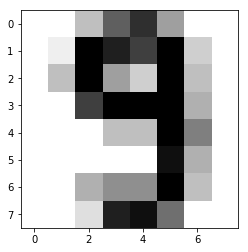

In [146]:
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
#example - fifth last digit
plt.show()
#this digit was classified by model as 9

In [148]:
#clf = svm.SVC(gamma=0.0001, C=100)

In [155]:
X,y = digits.data[:-450], digits.target[:-450]
clf = svm.SVC(gamma=0.001, C=100)
X=X.reshape(-1,64)
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [156]:
X_test=digits.data[1797-450:1797].reshape(-1,64)
y_test=digits.target[1797-450:1797]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#it's easy to get high accuracy

Accuracy: 0.9689


In [154]:
for i in range(1000,1010):
    print(clf.predict(digits.data[i].reshape(-1,64))," ",digits.target[i])
#left - prediction, right - real value

[1]   1
[4]   4
[0]   0
[5]   5
[3]   3
[6]   6
[9]   9
[6]   6
[1]   1
[7]   7


In [158]:
import csv
dane=[]
klasy=[]
with open('mnist_test.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        #dane.append((numpy.asarray(row[:-1])).reshape(-1,784))
        dane.append(row[1:785])
        klasy.append(row[0])

In [159]:
len(dane[1])

784

In [161]:
clf = svm.SVC(gamma=0.0001, C=100)
X,y = dane[:-2000], klasy[:-2000]
clf.fit(X,y)
#the model is learning about 3 minutes

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [162]:
X_test=dane[8000:10000]
y_test=klasy[8000:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#low accuracy, because gamma was low

Accuracy: 0.1150


In [174]:
#learning about 10 seconds
clf = svm.SVC(gamma=0.000000001,C=100)
X,y = dane[:-9000], klasy[:-9000]
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-09, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#quite good accuracy

Accuracy: 0.8020


In [176]:
clf = svm.SVC()
X,y = dane[:-9000], klasy[:-9000]
clf.fit(X,y)
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))

Accuracy: 0.1200


In [184]:
clf = svm.SVC(gamma=0.00000001,C=1000)
X,y = dane[:-9000], klasy[:-9000]
clf.fit(X,y)
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))

Accuracy: 0.8160


In [185]:
clf = svm.SVC(gamma=0.00000005,C=1000)
X,y = dane[:-9000], klasy[:-9000]
clf.fit(X,y)
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))

Accuracy: 0.8360


In [186]:
clf = svm.SVC(gamma=0.00000009,C=1000)
X,y = dane[:-9000], klasy[:-9000]
clf.fit(X,y)
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))

Accuracy: 0.8520


In [187]:
clf = svm.SVC(gamma=0.0000004,C=1000)
X,y = dane[:-9000], klasy[:-9000]
clf.fit(X,y)
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))

Accuracy: 0.8760


In [189]:
clf = svm.SVC(gamma=0.0000008,C=1000)
X,y = dane[:-9000], klasy[:-9000]
clf.fit(X,y)
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))

Accuracy: 0.8180


In [191]:
clf = svm.SVC(gamma=0.0000004,C=1000)
X,y = dane[:-2000], klasy[:-2000]
clf.fit(X,y)
#learning about 3 minutes
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#bigger dataset gives higher accuracy

Accuracy: 0.9460


In [192]:
clf = svm.SVC(gamma=0.00000004,C=1000)
X,y = dane[:-2000], klasy[:-2000]
clf.fit(X,y)
#learning about 3 minutes
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#zmniejszenie gammy nie poprawilo dokladnosci

Accuracy: 0.9240


In [195]:
clf = svm.SVC(gamma='auto',C=1000)
X,y = dane[:-2000], klasy[:-2000]
clf.fit(X,y)
#learning about 3 minutes
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#using default value of gamma in "svm.SVC" function gives random classificator

Accuracy: 0.1200


In [199]:
clf = svm.SVC(gamma=0.00000004,C=100)
X,y = dane[:-2000], klasy[:-2000]
clf.fit(X,y)
#learning about 3 minutes
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))

Accuracy: 0.9240


In [198]:
clf = svm.SVC(gamma=0.00000004,C=1)
X,y = dane[:-2000], klasy[:-2000]
clf.fit(X,y)
#learning about 3 minutes
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#smaller value of C in "svm.SVC" function may also decrease accuracy

Accuracy: 0.8920


In [200]:
clf = svm.SVC(gamma=0.00000004,C=10)
X,y = dane[:-2000], klasy[:-2000]
clf.fit(X,y)
#learning about 3 minutes
X_test=dane[9500:10000]
y_test=klasy[9500:10000]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#C=10 is better than C=1 and C=100.

Accuracy: 0.9260
